# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [2]:
# your code here

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:
# your code here
df = pd.read_csv('exch_rates.csv')

In [4]:
df.columns

Index(['Frequency', 'Euro', 'Australian Dollar', 'Danish Krone'], dtype='object')

In [5]:
df.dtypes

Frequency             object
Euro                 float64
Australian Dollar    float64
Danish Krone         float64
dtype: object

In [6]:
df['Frequency']= pd.to_datetime(df['Frequency'])

In [7]:
df.set_index(df['Frequency'],inplace= True )

In [8]:
df.drop(columns= 'Frequency', inplace= True)

In [9]:
df.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


In [10]:
df.dropna(inplace=True)

Plot the three exchange rates in one plot

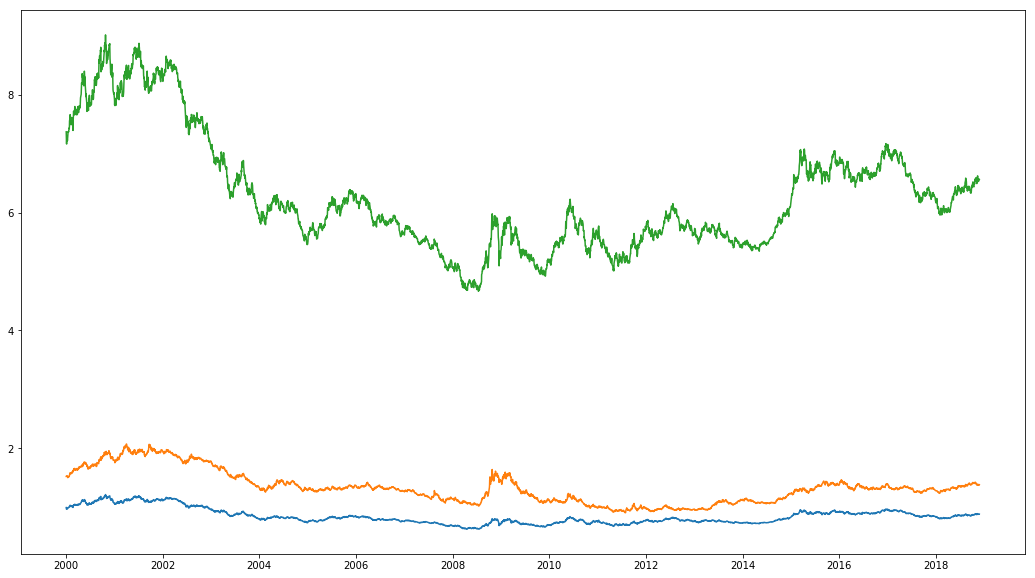

In [11]:
# your code here
plt.figure(figsize= (18,10))
plt.plot(df['Euro'])
plt.plot(df['Australian Dollar'])
plt.plot(df['Danish Krone']);

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [12]:
# your code here

df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

All priced against the dollar, likely moving very closely together. Denmark also in Europe.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [13]:
# your code here
df_diff = df.diff()

In [14]:
df_diff.dropna(inplace=True)

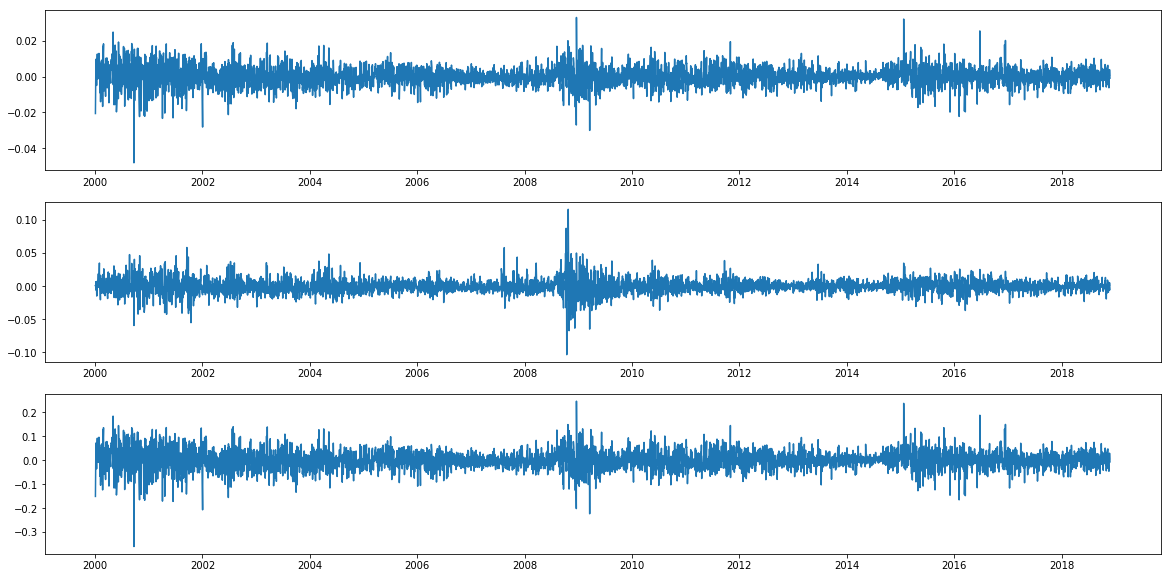

In [15]:
# your code here
fig= plt.figure(figsize=(20,10))
EUR, AUD, DNK = fig.subplots(ncols=1,nrows=3)
EUR.plot(df_diff["Euro"])
AUD.plot(df_diff["Australian Dollar"])
DNK.plot(df_diff['Danish Krone']);

### Explain what's going on

Day to day changes are similar

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [16]:
# your code here
Euro= df['Euro']

lag_1_autocorrelation = df['Euro'].autocorr(lag=1)

In [17]:
Euro_1lag = Euro.shift(1)

In [18]:
lag_1_autocorrelation

0.9991186790242571

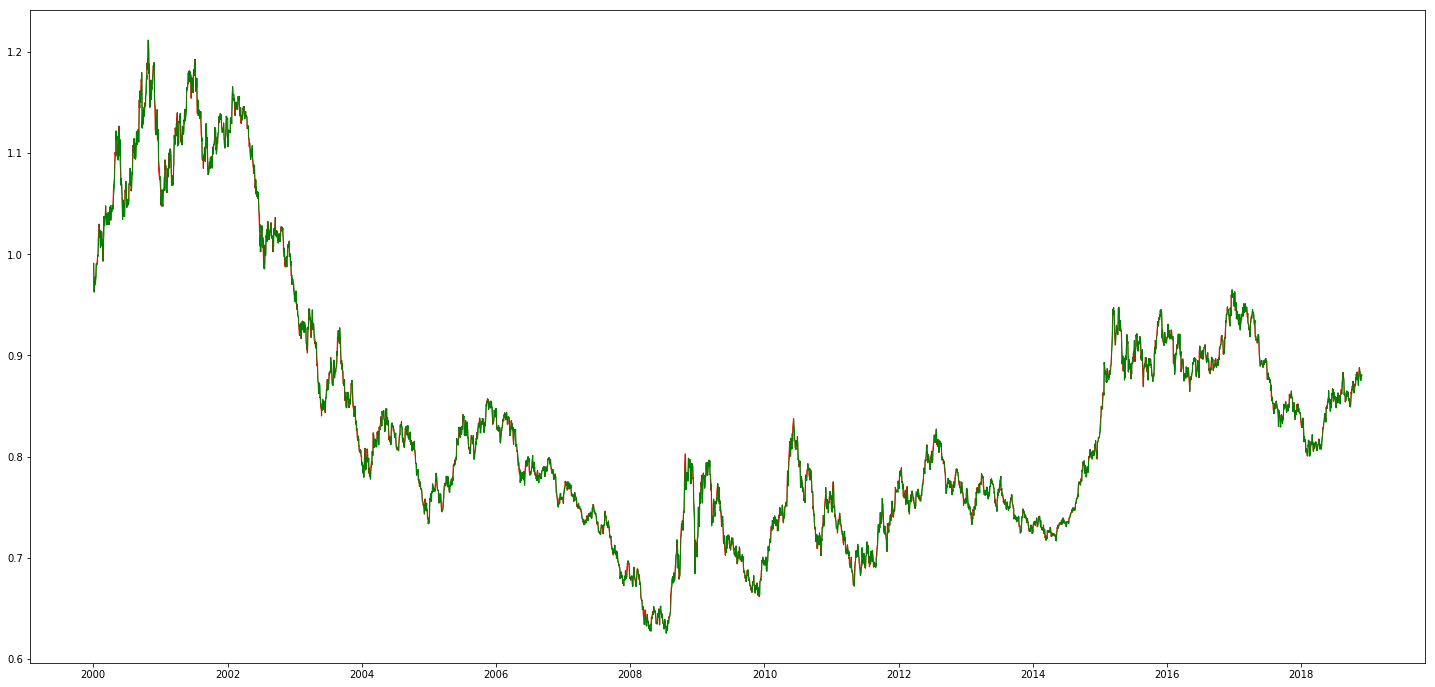

In [19]:
plt.figure(figsize= (25,12))
plt.plot(Euro, color = 'red', linewidth=1, markersize=12)
plt.plot(Euro_1lag,color = 'green', linewidth=1, markersize=12)
plt.show();

In [20]:
# your code here
Euro_5lag = Euro_1lag.shift(5)

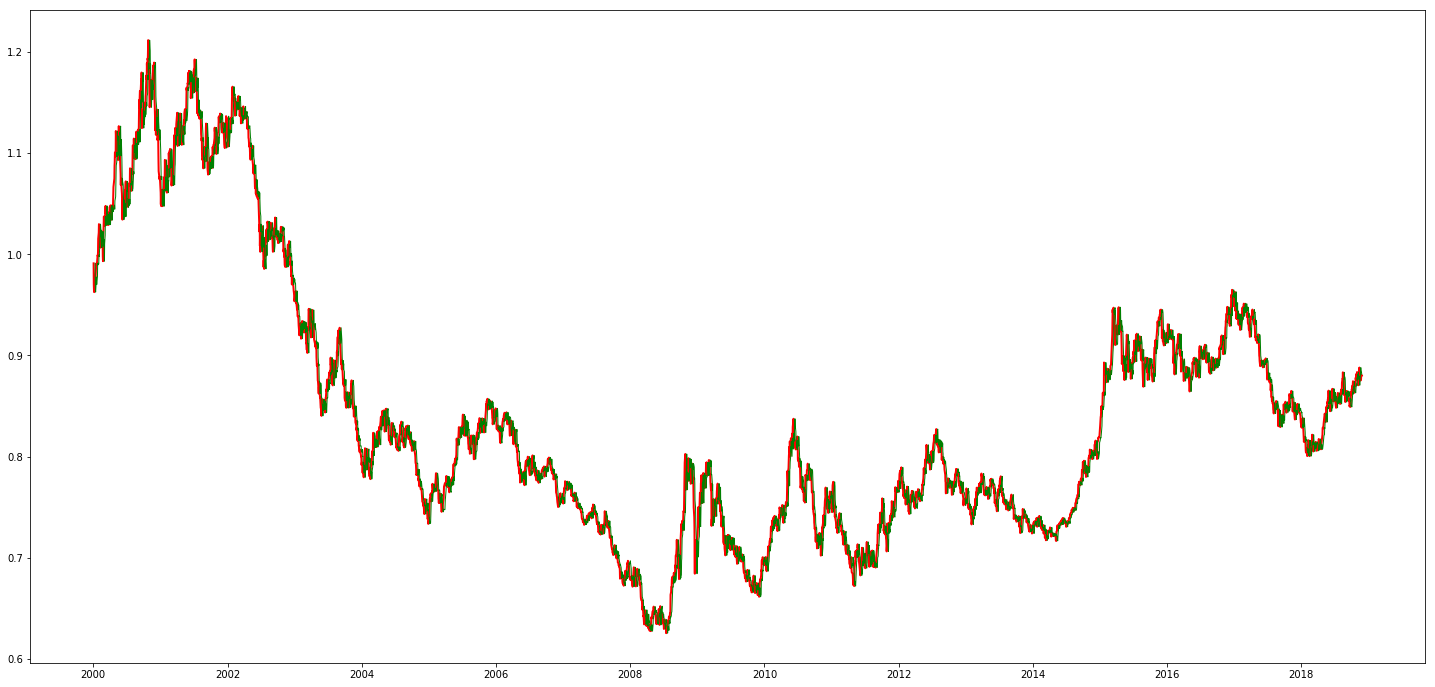

In [21]:
plt.figure(figsize= (25,12))
plt.plot(Euro, color = 'red', linewidth=2, markersize=12)
plt.plot(Euro_5lag,color = 'green', linewidth=1, markersize=12)
plt.show();

Repeat this, but for a "lag 5 autocorrelation"

In [22]:
# your code here
lag_5_autocorrelation = Euro.autocorr(lag=5)

In [23]:
lag_5_autocorrelation

0.9957375933468017

### What's your conclusion here?

Knowing this, let's plot the ACF now.

In [24]:
Euro.shape

(4838,)

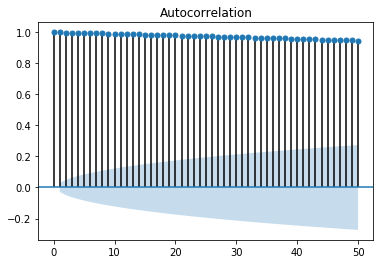

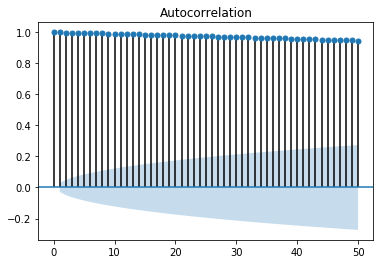

In [25]:
# your code here
plot_acf(Euro,lags=50)

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

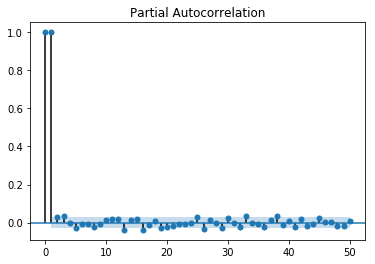

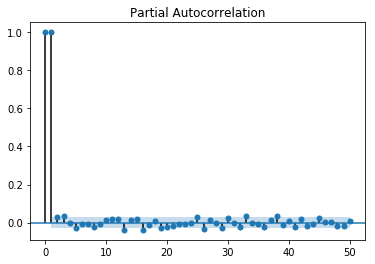

In [26]:
# your code here
plot_pacf(Euro,lags=50)

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [27]:
# your code here
df= pd.read_csv('passengers.csv')

In [28]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [29]:
# your code here

df['Month'] = pd.to_datetime(df['Month'])

In [30]:
df.set_index('Month', inplace= True)

In [31]:
df.dropna(inplace= True)

In [32]:
# your code here
df_diff = df.diff()
df_diff.dropna(inplace=True)

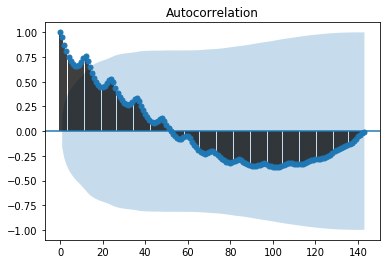

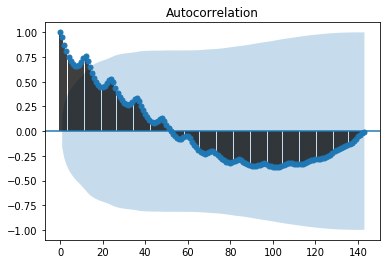

In [33]:
plot_acf(df)

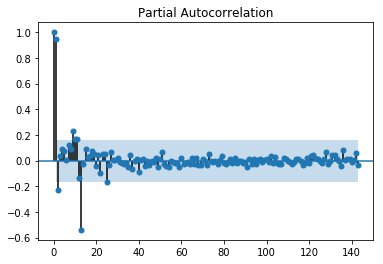

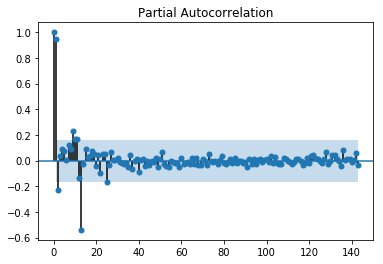

In [44]:
# your code here
plot_pacf(df, method = 'ywm', use_vlines= True)

In [35]:
df.iloc[50:60]

,#Passengers
Month,
1953-03-01,236
1953-04-01,235
1953-05-01,229
1953-06-01,243
1953-07-01,264
1953-08-01,272
1953-09-01,237
1953-10-01,211
1953-11-01,180


In [36]:
# your code here

In [37]:
# your code here

In [ ]:
# your code here

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [67]:
# your code here
df= pd.read_csv('NYSE_monthly.csv')

In [68]:
df.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [69]:
# your code here
df['Month']= pd.to_datetime(df['Month'])

In [70]:
df.set_index('Month', inplace= True )

In [71]:
df.dropna(inplace= True)

In [63]:
# your code here
df_diff= df.diff()

In [64]:
df_diff.head()

,Month,monthly_return
0,NaT,NaN
1,31 days,-0.023
2,28 days,-0.009
3,31 days,-0.042
4,30 days,0.034


In [77]:
df.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


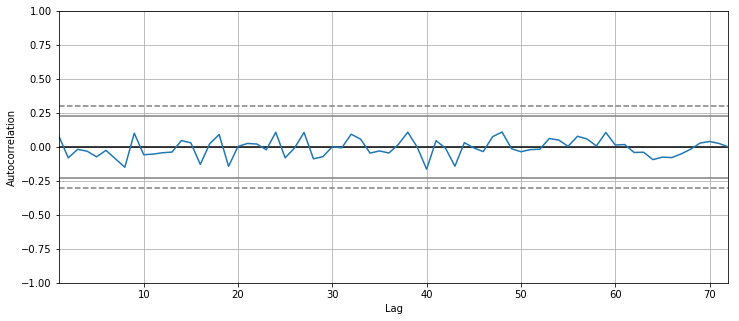

In [87]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df.dropna());

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


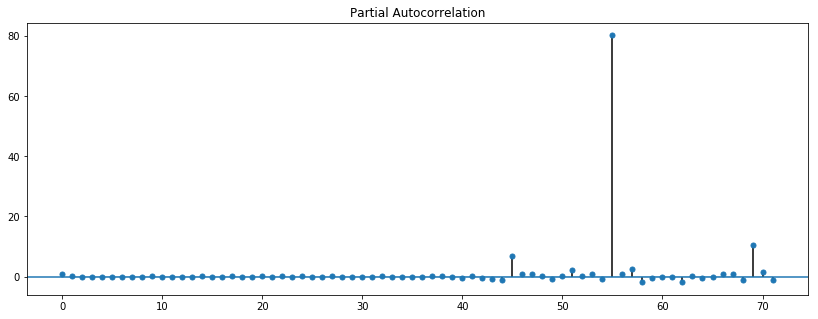

In [90]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(df, lags =100);

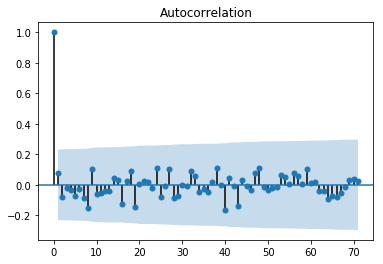

In [83]:
plot_acf(df);

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


<Figure size 1008x360 with 0 Axes>

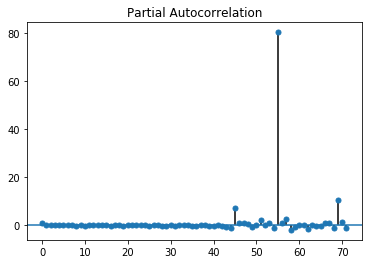

In [80]:
plt.figure(figsize=(14,5))
plot_pacf(df, lags=100);

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!